<a href="https://colab.research.google.com/github/PrateekKumar135/SOFTWARE_RELIABILITY_PREDICTION_ML/blob/main/SOFTWARE_FAULT_PREDICTION(JM1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# !pip install dataprep

In [8]:
# from dataprep.eda import create_report
# import pandas as pd
# data = pd.read_csv('/content/jm1.csv')
# create_report(data)

In [9]:
# !pip install autoviz

In [10]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV= AutoViz_Class()
# import matplotlib.pyplot as plt
# %matplotlib inline

In [11]:
# dft = AV.AutoViz('/content/jm1.csv',verbose = 2,chart_format='png')
# dft

In [4]:
# Loading some example data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
pc1_data = pd.read_csv('/content/jm1.csv')

X = pc1_data.drop("defects", axis=1)
y = pc1_data.defects


In [13]:
pc1_data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [14]:
pc1_data.shape

(13204, 22)

In [15]:
y.value_counts()

False    11101
True      2103
Name: defects, dtype: int64

In [5]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority',random_state=0)
X_res,y_res= ros.fit_resample(X,y)
y_res.value_counts()

False    11101
True     11101
Name: defects, dtype: int64

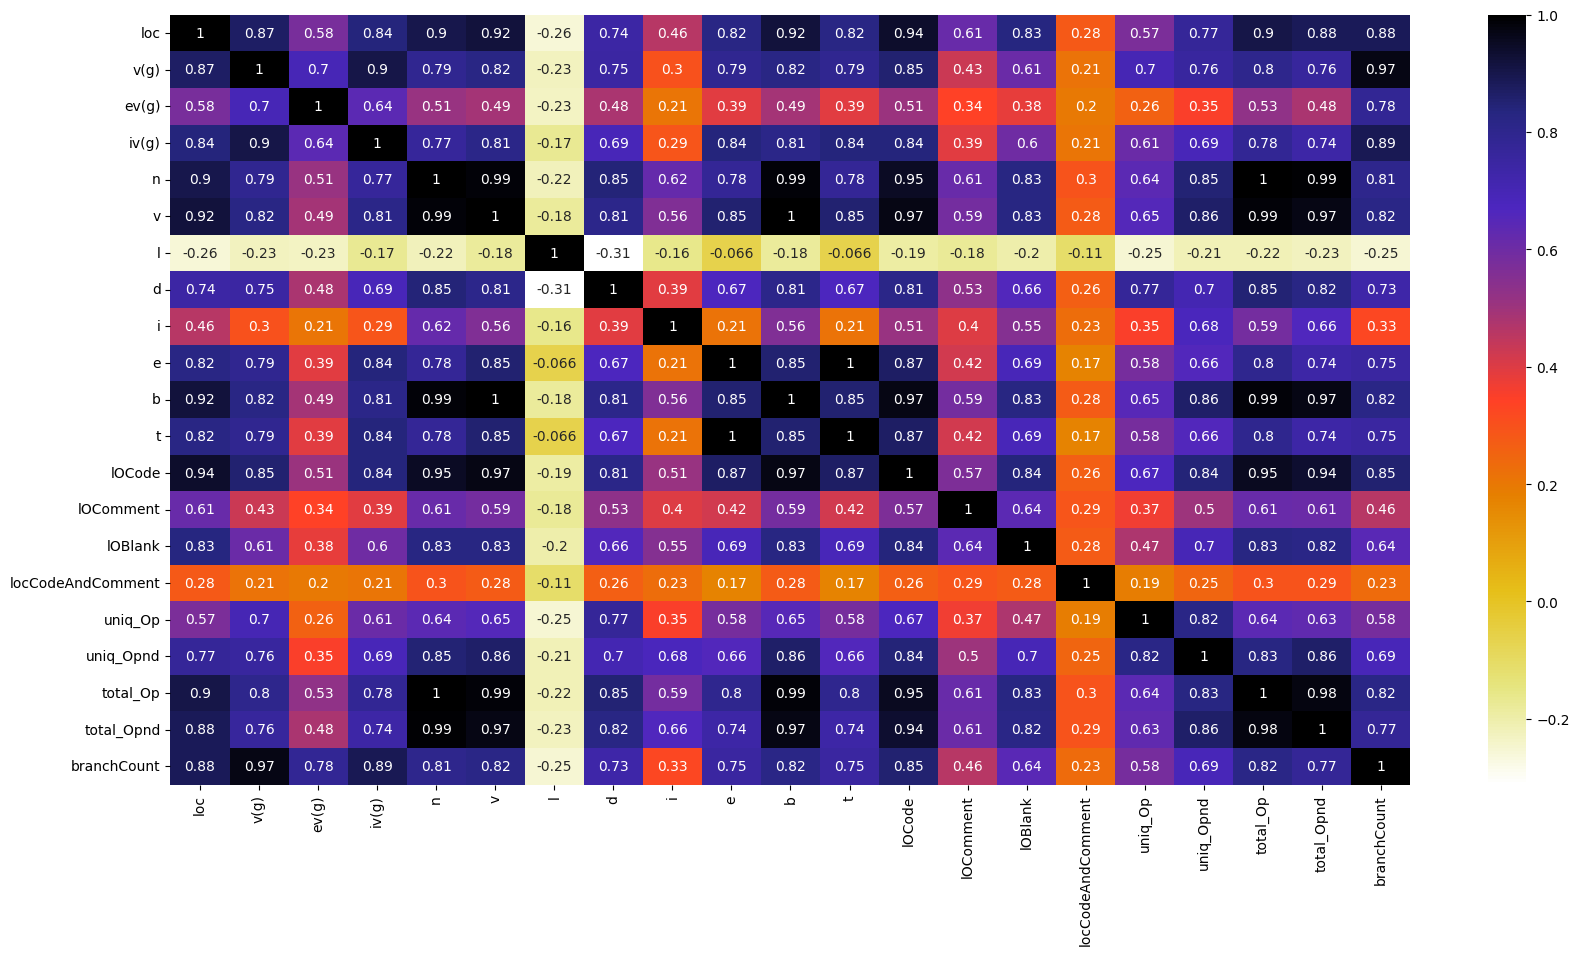

In [6]:
# Split test and train data
X_res_train,X_res_test,y_res_train,y_res_test= train_test_split(X_res,y_res,test_size=0.2,random_state=0)
plt.figure(figsize=(20,10))
cor = X_res_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

def correlation(dataset,threshold):
  col_corr =set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [7]:
corr_features = correlation(X_res_train,0.8)
print(corr_features)
print(len(corr_features))

{'total_Opnd', 'v', 'e', 'total_Op', 'd', 'b', 't', 'branchCount', 'iv(g)', 'uniq_Opnd', 'v(g)', 'n', 'lOBlank', 'lOCode'}
14


In [8]:
X_res_train=X_res_train.drop(corr_features,axis=1)
X_res_test=X_res_test.drop(corr_features,axis=1)

**RIDGE CLASSIFIER**

In [11]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
# corr_features = correlation(X_res_train,0.6)


cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
clf = RidgeClassifierCV(cv =cv_ori).fit(X_res_train,y_res_train)
y_pred = clf.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.6626885836523305
Mean Accuracy: 0.6539
Mean Precision: 0.6546
Mean Recall: 0.6540


In [12]:
y_scores = clf.decision_function(X_res_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_res_test, y_scores)


**LOGISTIC REGRESSION**

In [13]:
from sklearn.linear_model import LogisticRegressionCV
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_log = LogisticRegressionCV(n_jobs=-1,cv =cv_ori).fit(X_res_train,y_res_train)
y_pred = clf_log.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_log, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.6696689934699392
Mean Accuracy: 0.6596
Mean Precision: 0.6649
Mean Recall: 0.6592


**DECISION TREE**

In [15]:
from sklearn.tree import DecisionTreeClassifier
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_res_train,y_res_train)
y_pred = clf_dt.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_dt, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.9193875253321324
Mean Accuracy: 0.9016
Mean Precision: 0.9055
Mean Recall: 0.9018


**KNN**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_knn = KNeighborsClassifier(n_neighbors=4,n_jobs=-1).fit(X_res_train,y_res_train)
y_pred = clf_knn.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_knn, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.8356226075208286
Mean Accuracy: 0.8042
Mean Precision: 0.8053
Mean Recall: 0.8043


**ADA BOOST**

In [17]:
from sklearn.ensemble import AdaBoostClassifier
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.01,random_state=0).fit(X_res_train,y_res_train)
y_pred = clf_ada.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_ada, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.6687682954289574
Mean Accuracy: 0.6657
Mean Precision: 0.6665
Mean Recall: 0.6656


**GRADIENT BOOST**

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_gb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01,random_state=0).fit(X_res_train,y_res_train)
y_pred = clf_gb.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_gb, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.6867822562485927
Mean Accuracy: 0.6835
Mean Precision: 0.6840
Mean Recall: 0.6834


In [18]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score


gb_scores = clf_gb.predict_proba(X_res_test)[:,1]
ada_scores = clf_ada.predict_proba(X_res_test)[:,1]
knn_scores = clf_knn.predict_proba(X_res_test)[:,1]
dt_scores = clf_dt.predict_proba(X_res_test)[:,1]
log_scores = clf_log.predict_proba(X_res_test)[:,1]


# Generate ROC curve data for gradient boost,ada boost,knn,decision tree,logistic classification
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_res_test, gb_scores)
gb_auc = roc_auc_score(y_res_test, gb_scores)
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_res_test, ada_scores)
ada_auc = roc_auc_score(y_res_test, ada_scores)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_res_test, knn_scores)
knn_auc = roc_auc_score(y_res_test, knn_scores)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_res_test, dt_scores)
dt_auc = roc_auc_score(y_res_test, dt_scores)
log_fpr, log_tpr, log_thresholds = roc_curve(y_res_test, log_scores)
log_auc = roc_auc_score(y_res_test, log_scores)


# Define a list of colors for your models
# color?s = ['blue', 'orange', 'green', 'purple', 'red']
trace0 = go.Scatter(
    x=gb_fpr,
    y=gb_tpr,
    mode='lines',
    name=f'Gradient boost (Area = {gb_auc:.2f})',fill='none'
)


trace1 = go.Scatter(
    x=ada_fpr,
    y=ada_tpr,
    mode='lines',
    name=f'Ada boost (Area = {ada_auc:.2f})',fill='none'
)
trace2 = go.Scatter(
    x=knn_fpr,
    y=knn_tpr,
    mode='lines',
    name=f'KNN (Area = {knn_auc:.2f})',line=dict(color='orange')

)
trace3 = go.Scatter(
    x=dt_fpr,
    y=dt_tpr,
    mode='lines',
    name=f'Decision Tree (Area = {dt_auc:.2f})',line=dict(color='black')

)
trace4 = go.Scatter(
    x=log_fpr,
    y=log_tpr,
    mode='lines',
    name=f'Logistic regression (Area = {log_auc:.2f})'
)


# Diagonal line
trace5 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2,trace3, trace4, trace5]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegressionCV was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



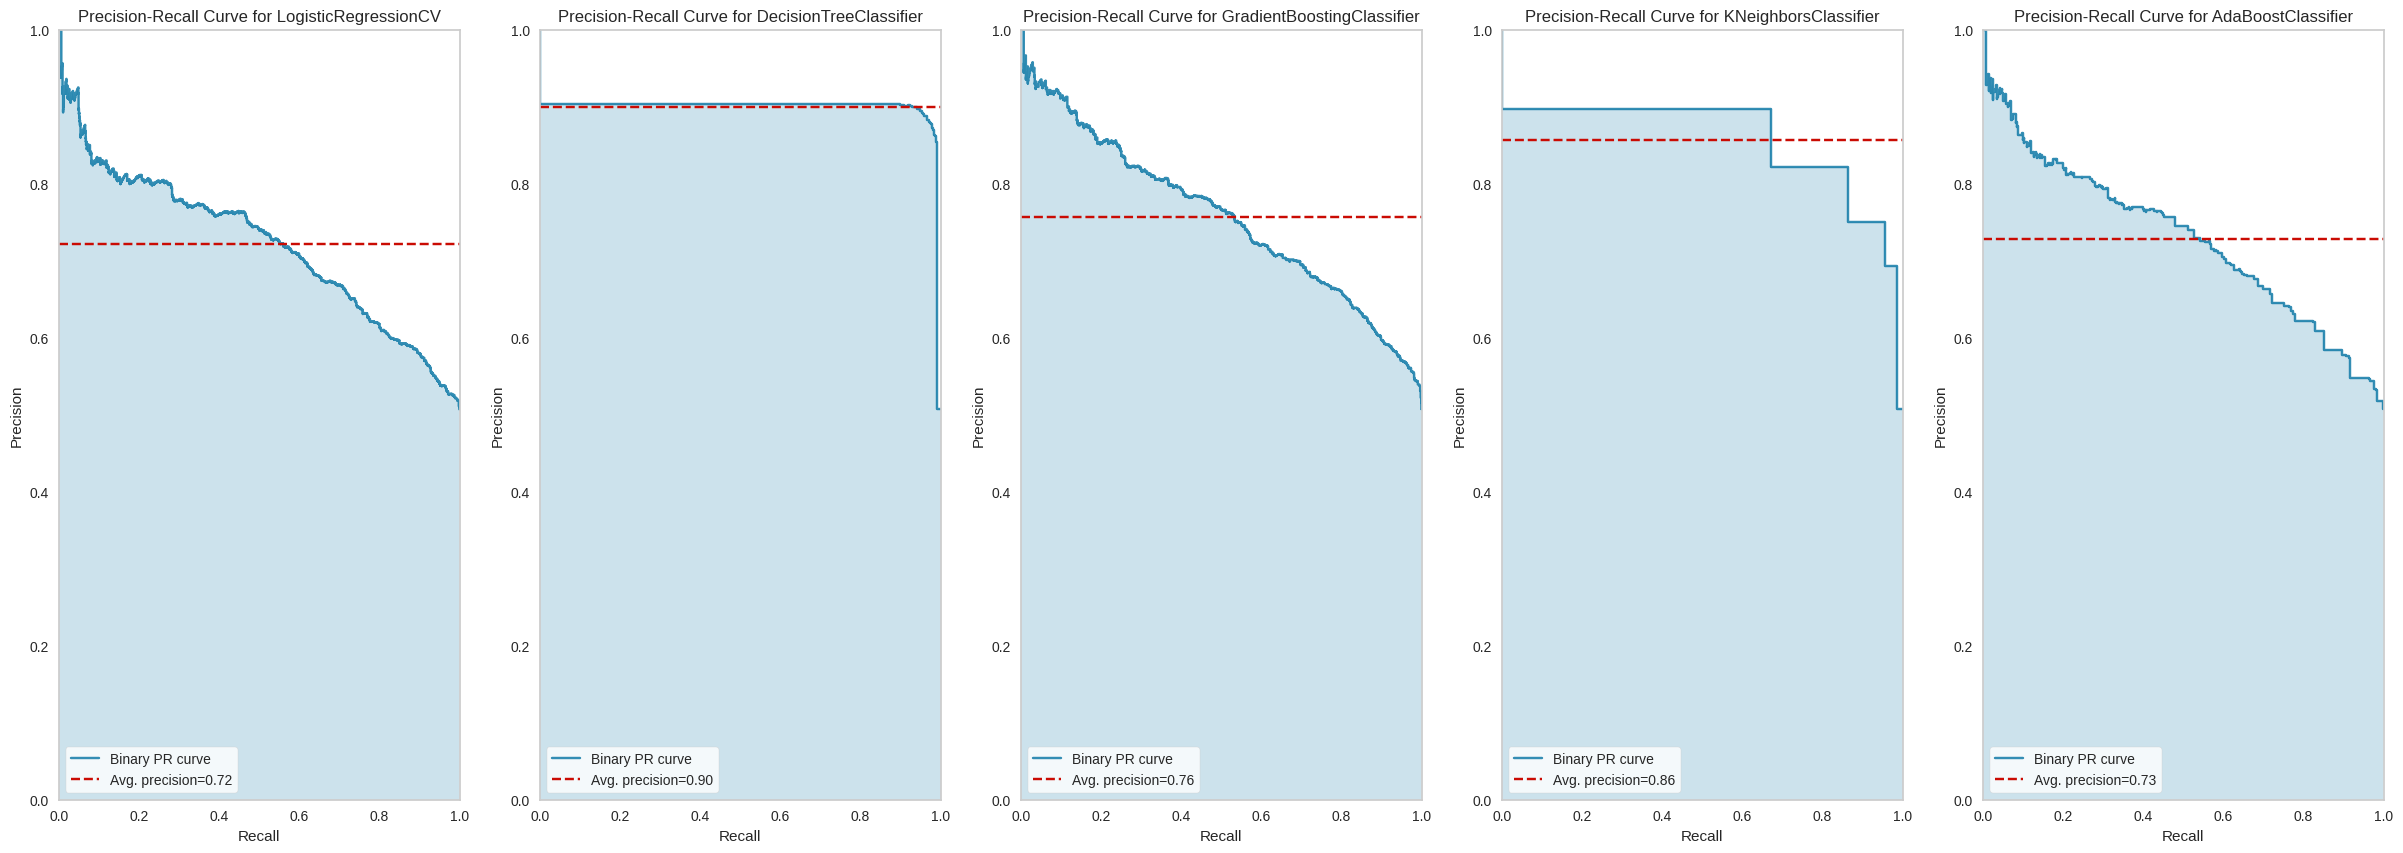

In [19]:
# Create the visualizers, fit, score, and show them
from yellowbrick.classifier import PrecisionRecallCurve
models = [clf_log,clf_dt,clf_gb,clf_knn,clf_ada]
_, axes = plt.subplots(ncols=5, figsize=(30,10))

for idx, ax in enumerate(axes.flatten()):
    viz = PrecisionRecallCurve(models[idx], ax=ax, show=False)
    viz.fit(X_res_train, y_res_train)
    viz.score(X_res_test, y_res_test)
    viz.finalize()

plt.show()